In [2]:
!pip install scvi-tools --quiet
!pip install scanpy

import scvi
import scanpy as sc


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 36.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 95.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


In [3]:
import scvi
import scanpy as sc

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import os
import pandas as pd

project_root    = "/content/drive/MyDrive/Cellranger/Chemirism"
souporcell_path = "/content/drive/MyDrive/Cellranger/Chemirism/newchimerismLV2"
h5ad_path       = "/content/drive/MyDrive/Cellranger/Chemirism/LV/filtered_adata.h5ad"
raw_matrix_dir  = "/content/drive/MyDrive/Cellranger/Chemirism/LV/outs/raw_feature_bc_matrix"




In [6]:
adata = sc.read_h5ad(h5ad_path)
print(f"Filtered adata: {adata.n_obs:,} cells × {adata.n_vars:,} genes")

Filtered adata: 10,601 cells × 36,601 genes


In [7]:
import os
import pandas as pd

clusters_file = os.path.join(souporcell_path, "clusters.tsv")
doublets_file = os.path.join(souporcell_path, "doublets.tsv")
doublets_err  = os.path.join(souporcell_path, "doublets.err")

clusters = pd.read_csv(clusters_file, sep="\t", header=None, names=["barcode","cluster"])
print(f"Loaded {len(clusters)} cluster assignments.")

if os.path.isfile(doublets_file):
    doublets = pd.read_csv(doublets_file, sep="\t", header=None)[0].tolist()
    print(f"Found {len(doublets)} doublets.")
else:
    print("No doublets.tsv found (zero doublets).")
    print("Souporcell stderr:\n", open(doublets_err).read().strip())


adata.obs["souporcell"] = adata.obs_names.map(
    clusters.set_index("barcode")["cluster"]
)
print("Cluster value counts:")
print(adata.obs["souporcell"].value_counts())


Loaded 10602 cluster assignments.
No doublets.tsv found (zero doublets).
Souporcell stderr:
 19798 loaded 0 counts, is this a problem?
error	AATCACGTCGACGCTG-1	1	0
error	ACTGTGAAGCCTTTGA-1	0	1
error	ATTACCTGTCATCCCT-1	1	0
error	CCACAAAAGTATGAAC-1	1	0
0 cells removed this round
Cluster value counts:
Series([], Name: count, dtype: int64)


In [8]:

print("clusters.tsv barcodes (first 10):")
print(clusters["barcode"].head(10).tolist())

print("\nadata.obs_names (first 10):")
print(adata.obs_names[:10].tolist())


clusters.tsv barcodes (first 10):
['cluster0', '-240.13178844734875', '-1165.3953428225323', '-201.09097113790125', '-185.45363481005438', '-398.61272814935387', '-80.07843269837271', '-54.73618686559149', '-262.46662875140754', '-234.29913441333133']

adata.obs_names (first 10):
['AAACCCACAATGCTCA-1', 'AAACCCACACCCTAAA-1', 'AAACCCACATGCAGCC-1', 'AAACCCAGTGACGCCT-1', 'AAACCCAGTTCAGTAC-1', 'AAACCCATCACCCTTG-1', 'AAACCCATCTTACGTT-1', 'AAACCCATCTTGCAAG-1', 'AAACGAAAGAAGAACG-1', 'AAACGAAAGCTTTCCC-1']


In [9]:
import os, pandas as pd

clusters_tmp_file = os.path.join(souporcell_path, "clusters_tmp.tsv")
clusters_tmp = pd.read_csv(clusters_tmp_file, sep="\t")

print("Columns:", clusters_tmp.columns.tolist())
print("First 10 rows:")
print(clusters_tmp.head(10))


Columns: ['AAACCCACAATGCTCA-1', '1', '-83.72386', '-77.26381']
First 10 rows:
   AAACCCACAATGCTCA-1  1   -83.72386   -77.26381
0  AAACCCACACCCTAAA-1  1 -635.972300 -591.808300
1  AAACCCACATGCAGCC-1  0 -115.727920 -125.648575
2  AAACCCAGTGACGCCT-1  1  -80.487724  -72.946190
3  AAACCCAGTTCAGTAC-1  0 -226.441910 -250.922520
4  AAACCCATCACCCTTG-1  1  -39.894370  -37.767918
5  AAACCCATCTTACGTT-1  0  -20.856405  -23.748854
6  AAACCCATCTTGCAAG-1  1  -98.085660  -86.716110
7  AAACGAAAGAAGAACG-1  1 -111.846990 -100.234700
8  AAACGAAAGCTTTCCC-1  0  -17.817350  -24.266523
9  AAACGAAAGGTGCCTC-1  1 -329.086980 -303.940580


### It contains barcode, cluster, UMAP-X coordiante and UMAP-Y coordinate. we need the first two: **barcode** and **cluster**

In [10]:
clusters_tmp = pd.read_csv(
    os.path.join(souporcell_path, "clusters_tmp.tsv"),
    sep="\t",
    header=None,
    names=["barcode","cluster","umap_x","umap_y"]
)
print(clusters_tmp.head(5))
print("Total assignments:", len(clusters_tmp))


              barcode  cluster      umap_x      umap_y
0  AAACCCACAATGCTCA-1        1  -83.723860  -77.263810
1  AAACCCACACCCTAAA-1        1 -635.972300 -591.808300
2  AAACCCACATGCAGCC-1        0 -115.727920 -125.648575
3  AAACCCAGTGACGCCT-1        1  -80.487724  -72.946190
4  AAACCCAGTTCAGTAC-1        0 -226.441910 -250.922520
Total assignments: 10601


In [11]:
# (barcodes already have the "-1" suffix matching adata.obs_names)
adata.obs["chimerism"] = adata.obs_names.map(
    clusters_tmp.set_index("barcode")["cluster"]
)
print(adata.obs["chimerism"].value_counts(dropna=False))


chimerism
1    5403
0    5198
Name: count, dtype: int64


In [12]:
scvi.model.SCVI.setup_anndata(
    adata,
    batch_key="chimerism"
)


/usr/local/lib/python3.11/dist-packages/scvi/data/fields/_layer_field.py:115: UserWarning: Training will be faster when sparse matrix is formatted as CSR. It is safe to cast before model initialization.
  _verify_and_correct_data_format(adata, self.attr_name, self.attr_key)


In [13]:
vae = scvi.model.SCVI(adata, n_latent=20)
vae.train(
    max_epochs=200,
    early_stopping=True,
    check_val_every_n_epoch=10,
    early_stopping_patience=5
)

adata.obsm["X_scVI"] = vae.get_latent_representation()


INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: You are using a CUDA device ('NVIDIA L4') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
INFO:lightning.pytorch.utilities.rank_zero:You are using a CUDA device ('NVIDIA L4') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more det

Training:   0%|          | 0/200 [00:00<?, ?it/s]

Monitored metric elbo_validation did not improve in the last 5 records. Best score: 4503.640. Signaling Trainer to stop.


In [14]:
sc.pp.neighbors(adata, use_rep="X_scVI", n_neighbors=15)
sc.tl.umap(adata, min_dist=0.3)


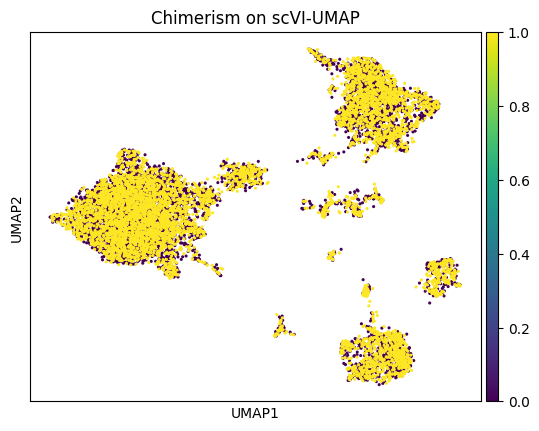

In [15]:
sc.pl.umap(
    adata,
    color="chimerism",
    palette=["#777777","#FF5555"],
    title="Chimerism on scVI-UMAP",
    size=20
)


In [16]:
counts = adata.obs["chimerism"].value_counts().sort_index()
props  = counts / counts.sum() * 100

print(f"Recipient (0): {counts[0]} cells ({props[0]:.1f}%)")
print(f"Donor     (1): {counts[1]} cells ({props[1]:.1f}%)")


Recipient (0): 5198 cells (49.0%)
Donor     (1): 5403 cells (51.0%)


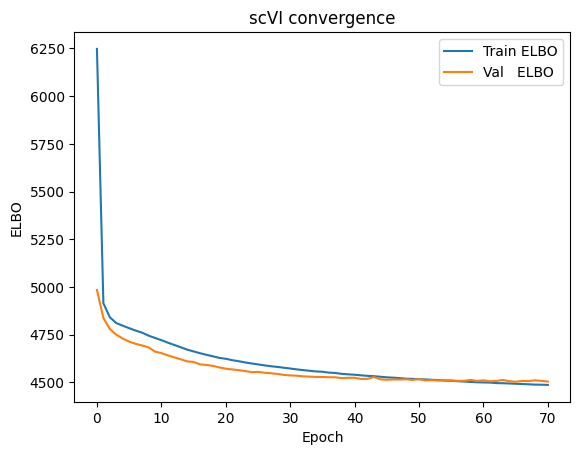

In [17]:

import matplotlib.pyplot as plt

hist = vae.history
plt.plot(hist["elbo_train"],    label="Train ELBO")

if "elbo_validation" in hist:
    plt.plot(hist["elbo_validation"], label="Val   ELBO")

plt.xlabel("Epoch")
plt.ylabel("ELBO")
plt.legend()
plt.title("scVI convergence")
plt.show()


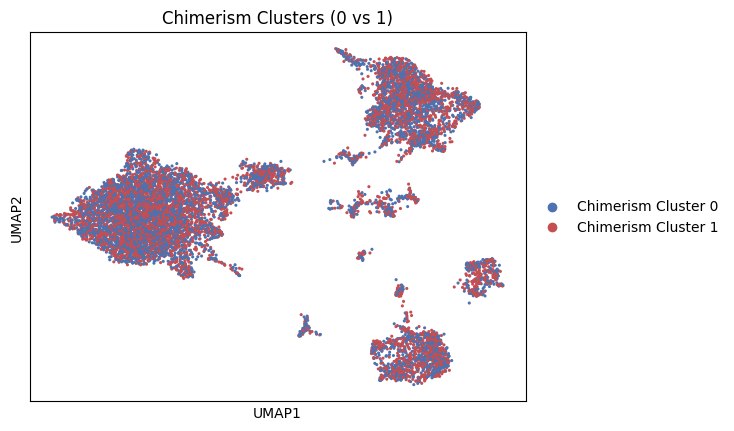

chim_cluster
Chimerism Cluster 1    5403
Chimerism Cluster 0    5198
Name: count, dtype: int64


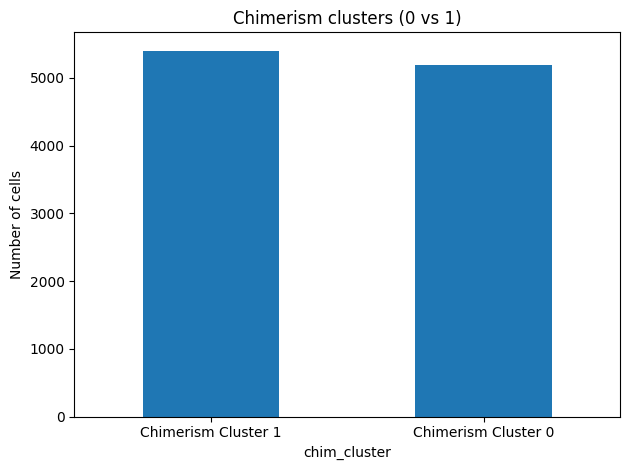

In [18]:

adata.obs["chim_cluster"] = adata.obs["chimerism"].map({
    0: "Chimerism Cluster 0",
    1: "Chimerism Cluster 1"
})


import scanpy as sc

sc.pl.umap(
    adata,
    color="chim_cluster",
    palette=["#4C72B0","#C44E52"],
    title="Chimerism Clusters (0 vs 1)",
    size=20,
    save="__genotype_umap.PDF"
)


counts = adata.obs["chim_cluster"].value_counts()
print(counts)

import matplotlib.pyplot as plt
counts.plot(kind="bar", rot=0)
plt.ylabel("Number of cells")
plt.title("Chimerism clusters (0 vs 1)")
plt.tight_layout()
plt.savefig("CHEM_UMAPPLUS_HD.png", dpi=600, bbox_inches='tight')
plt.savefig("CHEM_UMAPPLUS_HD.pdf", bbox_inches='tight')

plt.show()


In [19]:
print(adata.obs.columns.tolist())


['souporcell', 'chimerism', '_scvi_batch', '_scvi_labels', 'chim_cluster']


In [20]:

import scanpy as sc


sc.pp.normalize_total(adata, target_sum=1e4)

sc.pp.log1p(adata)

adata.raw = adata

group_key = "chimerism"
adata.obs[group_key] = adata.obs[group_key].astype("category")

sc.tl.rank_genes_groups(
    adata,
    groupby=group_key,
    method="wilcoxon",
    use_raw=True,
    pts=True
)



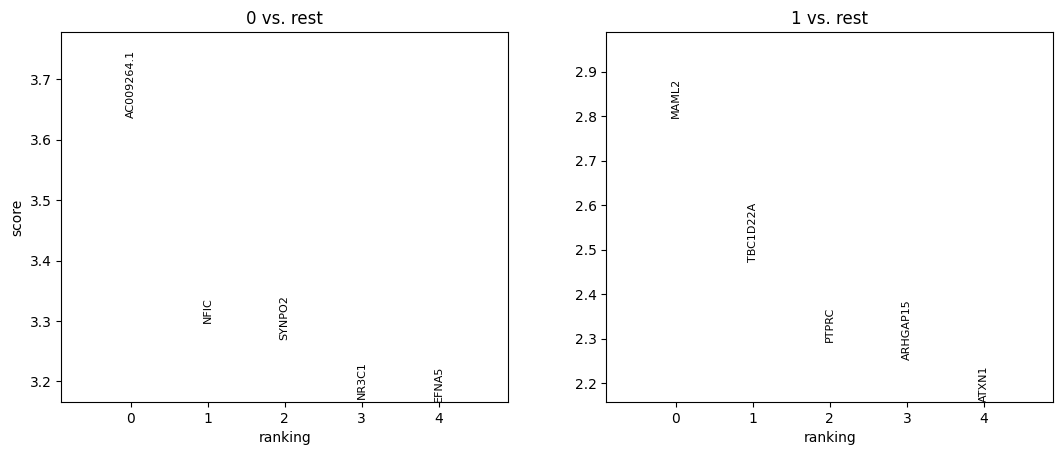

In [21]:
sc.pl.rank_genes_groups(
    adata,
    n_genes=5,
    sharey=False,
    key="rank_genes_groups",
    save="_chim­erism_DE.pdf"
)


### DE‐marker approach

Cluster 1 top hits include PTPRC (CD45), ARHGAP15, MAML2… classic immune genes → these must be the recipient infiltrating **immune cells**.

Cluster 0 top hits include NFIC, SYNPO2, NR3C1, EFNA5… **non‐immune**, parenchymal/structural genes → these are your donor heart cells.


In [22]:
print(adata.obs["souporcell"].dtype)
print(adata.obs["souporcell"].unique())


float64
[nan]


genotype
Recipient    5403
Donor        5198
Name: count, dtype: int64


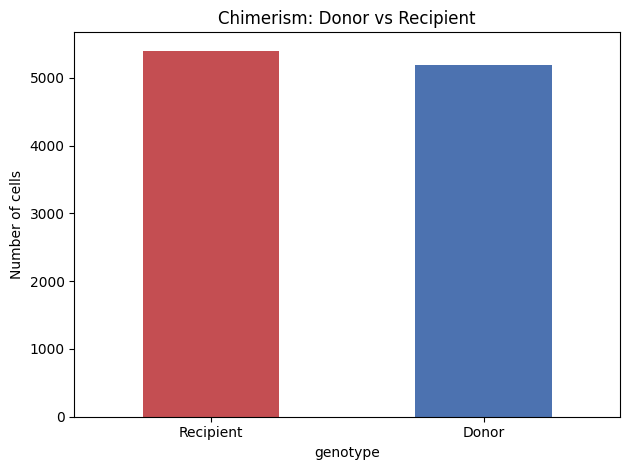

In [23]:

adata.obs["genotype"] = adata.obs["chimerism"].map({
    0: "Donor",
    1: "Recipient"
})


print(adata.obs["genotype"].value_counts(dropna=False))


import matplotlib.pyplot as plt
counts = adata.obs["genotype"].value_counts()
counts.plot(kind="bar", color=["#C44E52","#4C72B0"], rot=0)
plt.ylabel("Number of cells")
plt.title("Chimerism: Donor vs Recipient")
plt.tight_layout()

plt.savefig("/content/CHEM_Ratios_HD.png", dpi=600, bbox_inches='tight')
plt.savefig("/content/CHEM_Ratios_HD.pdf", bbox_inches='tight')

plt.show()


In [24]:
adata.obs["souporcell"] = adata.obs_names.map(
    clusters_tmp.set_index("barcode")["cluster"]
)
print(adata.obs["souporcell"].value_counts(dropna=False))


souporcell
1    5403
0    5198
Name: count, dtype: int64
